In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
online = pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


### Number of rows and columns in data set

In [8]:
print("Rows in dataset:", online.shape[0])
print("Columns in dataset:", online.shape[1])

Rows in dataset: 541909
Columns in dataset: 8


### Information of Dataset

- Here we will get some information about datatypes of the columns and number of non zero rows in each column. From the information bellow we can conclude that column Description and CustomerID columns contains some missing values. This fact will be examined in further steps.

In [9]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### converting InvoiceDate column to 'datetime' type

In [10]:
online['InvoiceDate']= pd.to_datetime(online['InvoiceDate'])
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
print("Unique Customer ID:", len(online['CustomerID'].unique().tolist()))

Unique Customer ID: 4373


In [12]:
online.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


* From descriptive statistics of quantitative variables (Quantity and UnitPrice), we could see that there are negative values in these variables, which are not possible values for price and quantity.

* There are negative values in these variables. In the problem statement of dataset it is mentioned that there are some canceled transactions/ cancellations mentioned in dataset. 

### DATA CLEANING:

- Canceled transactions are indicated by invoice number which starts with letter 'C'. 

- Probably canceled transactions also have negative values of quantity.

- Filtering transactions having invoice number initialized with letter 'C'.

In [13]:
# Filtering of invoice number initialized with letter 'C'
cancel = online[online['InvoiceNo'].astype(str).str.contains('C')]
cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [14]:
cancel[cancel['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


- Among cancelled transactions there are no transaction with positive quantity


- Hovewer some transactions with negative quantity doesn't belong to cancelled

In [15]:
print("Number of Cancelled Transactions:", len(cancel))
print("Transaction with quantity equal & less than 0:", online[online['Quantity'] <= 0 ]['Quantity'].count())
print("Transaction with quantity= 0:", online[online['Quantity'] == 0 ]['Quantity'].count())

Number of Cancelled Transactions: 9288
Transaction with quantity equal & less than 0: 10624
Transaction with quantity= 0: 0


- There are also transactions with zero price. Transactions with zero price doesn't bring usefull information to analysis, moreover mainly there are not any description for such transactions. This transactions could be deleted.

In [16]:
online[online['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


- Also there are 2 transactions with negative price. From the description we could see that these transactions were probably made as some correction, so they also should be deleted.

In [17]:
online[online['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


- As it was mentioned before there are some negative quantity transactions wich are not cancelled, hovewer all these transactions have 0 price.

In [18]:
price_0 = online[~online['InvoiceNo'].astype(str).str.contains('C')]  
print("Transactions with negative quantity value among non-cancelled transactions:" ,len(price_0[price_0['Quantity']<=0]))
print("Transactions with zero price and negative quantity" ,len(price_0[(price_0['Quantity']<=0) & (price_0['UnitPrice'] == 0)]))

Transactions with negative quantity value among non-cancelled transactions: 1336
Transactions with zero price and negative quantity 1336


In [19]:
print("Percentage cancelled transactions:" , round(len(cancel)/len(online)*100, 2),"%")
print("Precentage transactions with zero or negative price:" ,round(len(online[online['UnitPrice']<=0])/len(online)*100, 2),"%")

Percentage cancelled transactions: 1.71 %
Precentage transactions with zero or negative price: 0.46 %


In [20]:
online_new = online[(online['UnitPrice'] > 0) & (online['Quantity'] > 0)]

- New dataset created with only positive quantity & price values 

In [21]:
online_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [22]:
print("Rows in new created dataset:", online_new.shape[0])
print("Columns in new created dataset:", online_new.shape[1])

Rows in new created dataset: 530104
Columns in new created dataset: 8


- Finding transactions having duplicate invoice number i.e, multiple products billed in a particular invoice.

In [23]:
print("Number of duplicated transactions:", len(online_new[online_new.duplicated()]))

Number of duplicated transactions: 5226


In [24]:
online_new.drop_duplicates(inplace = True)

C:\Users\Jigar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
online_new = online_new.dropna(subset=['CustomerID'])

In [26]:
print("Rows in new created dataset (post cleaning):", online_new.shape[0])
print("Columns in new created dataset(post cleaning):", online_new.shape[1])

Rows in new created dataset (post cleaning): 392692
Columns in new created dataset(post cleaning): 8


- It should be taken into accoun that the same description could be written in different cases, let's convert all description into lowercase.

In [27]:
online_new['Description'] = online_new['Description'].str.lower()

In [28]:
print("Number of unique descriptions:", len(online_new['Description'].unique().tolist()))

Number of unique descriptions: 3877


In [29]:
online_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
online_new.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [31]:
online_new.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541894,581587,22631,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,plasters in tin circus parade,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,plasters in tin strongman,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,alarm clock bakelike pink,4,2011-12-09 12:50:00,3.75,12680.0,France
541898,581587,22727,alarm clock bakelike red,4,2011-12-09 12:50:00,3.75,12680.0,France
541899,581587,22726,alarm clock bakelike green,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,alarm clock bakelike ivory,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,childrens apron spaceboy design,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,spaceboy lunch box,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,childrens cutlery spaceboy,4,2011-12-09 12:50:00,4.15,12680.0,France


In [32]:
import re

In [33]:
online_new['Description'] = online_new['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

- Post applying regex function unqiue descriptions count will decrease.

In [34]:
print("Number of unique descriptions:", len(online_new['Description'].unique().tolist()))

Number of unique descriptions: 3867


In [35]:
print("Number of unique Stock Codes:",len(online_new['StockCode'].unique().tolist()))

Number of unique Stock Codes: 3665


- Stock Code should be numerical value of 5 digits, hovewer there are some transactions which contains only multiple letters/words, those transactions are to be dropped.
- Taking the Stock Codes which have only 5 digits, and the rest are ignored.

In [36]:
online_new = online_new.loc[online_new['StockCode'].astype(str).str[0:4].str.isdigit()]

In [37]:
print("Number of unique Stock Codes (post cleaning n dropping):",len(online_new['StockCode'].unique().tolist()))

Number of unique Stock Codes (post cleaning n dropping): 3659


In [38]:
online_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
online_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  float64       
 7   Country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.9+ MB


In [40]:
print("Rows in new created dataset (post all cleaning):", online_new.shape[0])
print("Columns in new created dataset(post all cleaning):", online_new.shape[1])

Rows in new created dataset (post all cleaning): 391150
Columns in new created dataset(post all cleaning): 8


In [41]:
online_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,391150.0,13.145300,180.807831,1.00,2.00,6.00,12.00,80995.0
UnitPrice,391150.0,2.874372,4.284738,0.04,1.25,1.95,3.75,649.5
CustomerID,391150.0,15295.171456,1710.339033,12346.00,13969.00,15159.00,16794.00,18287.0


#### Converting InvoiceDate feature to month, year, Week Day,hour & creating a new feature called Money Spent

In [42]:
online_new['month'] = online_new['InvoiceDate'].dt.month
online_new['year'] = online_new['InvoiceDate'].dt.year

In [43]:
online_new['WeekDay'] = online_new['InvoiceDate'].dt.day_name()
online_new['hour'] = online_new['InvoiceDate'].dt.hour

In [44]:
online_new['month_year'] = pd.to_datetime(online_new[['year', 'month']].assign(Day=1))

In [45]:
online_new['Money_Spent'] = online_new['UnitPrice'] * online_new['Quantity']

In [46]:
online_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,hour,month_year,Money_Spent
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34


In [47]:
online_new.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,hour,month_year,Money_Spent
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,Friday,12,2011-12-01,10.20
541905,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,Friday,12,2011-12-01,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,12,2011-12-01,16.60
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,12,2011-12-01,16.60
541908,581587,22138,baking set 9 piece retrospot,3,2011-12-09 12:50:00,4.95,12680.0,France,12,2011,Friday,12,2011-12-01,14.85


In [48]:
online_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  float64       
 7   Country      391150 non-null  object        
 8   month        391150 non-null  int64         
 9   year         391150 non-null  int64         
 10  WeekDay      391150 non-null  object        
 11  hour         391150 non-null  int64         
 12  month_year   391150 non-null  datetime64[ns]
 13  Money_Spent  391150 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(5)
memory usage: 44.8+ MB


In [49]:
print("Rows in new created dataset (post adding new features):", online_new.shape[0])
print("Columns in new created dataset(post adding new features):", online_new.shape[1])

Rows in new created dataset (post adding new features): 391150
Columns in new created dataset(post adding new features): 14


#### EDA done as per the new dataframe created

In [50]:
plot = pd.DataFrame(online_new.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(online_new.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(online_new.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(online_new.groupby(['month_year'])['Money_Spent'].mean()).reset_index()
plot5 = pd.DataFrame(online_new.groupby(['month_year'])['Money_Spent'].sum()).reset_index()

In [51]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

### How many orders per month?

- There are more purchasing made at the end of the year. The highest number of transactions were made during November. Probably reason could be the fact, that people tend to prepare for Christmas during November. Other than November number of byuings during the year is quite similar.


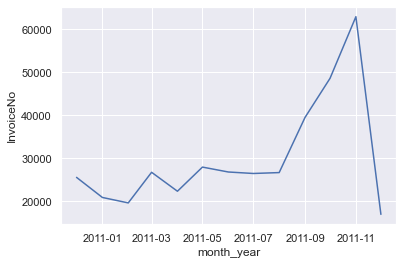

In [52]:
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

### How many orders per day?

- Interesting fact is that there were not any transaction on Saturday during the whole period. One of the explanations colud be some filter during the data collection process. Number of buyings are not significantly differ according to the day of the week.


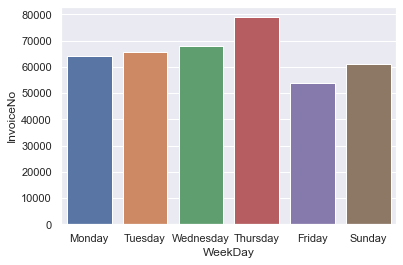

In [53]:
ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)

### How many orders per hour?

- The most number of transactions is done between 12 a.m. and 2 p.m., people tend to make there purchase during the lunch time. There aren't any transactions after 8 p.m. till 6 a.m.


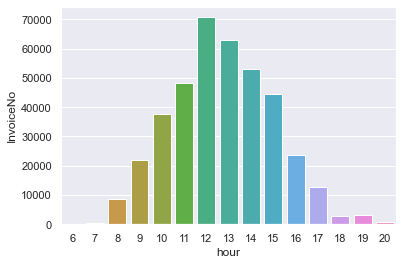

In [54]:
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

### Which month brings the highest Money Spent by customer ?

- The highest sales are also during the November, as the number of purchasing is the highest.

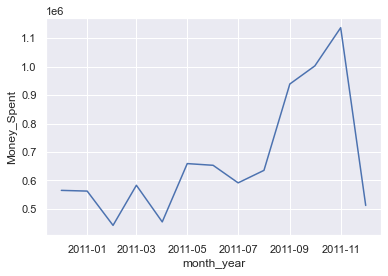

In [55]:
ax = sns.lineplot(x = 'month_year', y='Money_Spent', data = plot5)

In [56]:
#last date available in our dataset
online_new['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

- Most recent transaction date as per the data 

In [57]:
import datetime as dt

now = dt.date(2011,12,9)
print(now)

2011-12-09


In [58]:
#create a new column called date which contains the only the date of invoice
online_new['date'] = online_new['InvoiceDate'].dt.date
online_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,hour,month_year,Money_Spent,date
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,15.30,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,22.00,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34,2010-12-01
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,8,2010-12-01,20.34,2010-12-01


### Purchase_Gap

- To calculate Purchase_Gap in days, to understand how many days ago was the customer's last purchase.

In [59]:
#group by customers and check last date of purshace
pur_gap_data = online_new.groupby(by='CustomerID', as_index=False)['date'].max()
pur_gap_data.columns = ['CustomerID','Last_Purchase_Date']
pur_gap_data.head()

,CustomerID,Last_Purchase_Date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


- Evaluating Last Purchase Date & the days passed since the last purchase was made in relation the recent/ latest date

In [60]:
pur_gap_data['Purchase_Gap_Days'] = pur_gap_data['Last_Purchase_Date'].apply(lambda x: (now - x).days)
pur_gap_data.head()

,CustomerID,Last_Purchase_Date,Purchase_Gap_Days
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


- In the above dataframe, we have taken date -"2011-12-09" as the maximum date or most recent date as per data available (refer cell 52) and have shown the number of days the the customer was absent/ didn't visited the site via "Purchase_Gap_Days" as per last 'Last Purchase Date'.  

### Purchase Information:
- Getting the total purchase made till date as per money spent by a Customer as per data available 

In [61]:
purchase_data = online_new.groupby(by='CustomerID',as_index=False).agg({'Money_Spent': 'sum'})
purchase_data.columns = ['CustomerID','Purchase_Made']
purchase_data.head()

,CustomerID,Purchase_Made
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40


### Site Visit :
- Calculating the frequency or number of times the concerned online site was visited as per Customer ID provided in the dataset. 

In [62]:
online1=online_new
# drop duplicate invoices from Purchase record as one invoice as mnay products.
online1.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

# Actual Frequency of Site Visit (Clicks per customer)
sitevisit_data = online1.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
sitevisit_data.columns = ['CustomerID','Site_Visit_Frequency']
sitevisit_data.head()

,CustomerID,Site_Visit_Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [63]:
online2=online_new
# drop duplicate country from Country column.
online2.drop_duplicates(subset=['Country', 'CustomerID'], keep="first", inplace=True)

In [64]:
online2 = online2.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'month', 'year', 'WeekDay' , 'hour', 'month_year', 'Money_Spent', 'date'], axis=1)
online2.head()

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom


In [65]:
online3=online1
# drop duplicate country from Country column.
online3.drop_duplicates(subset=['Country', 'CustomerID'], keep="first", inplace=True)

In [66]:
online3 = online3.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'month', 'year', 'WeekDay' , 'hour', 'month_year', 'Money_Spent', 'date'], axis=1)
online3.head()

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom


In [67]:
online1 = online1.drop(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'month', 'year', 'WeekDay' , 'hour', 'month_year', 'Money_Spent', 'date'], axis=1)
online1.head()

,CustomerID,Country
0,17850.0,United Kingdom
9,13047.0,United Kingdom
26,12583.0,France
46,13748.0,United Kingdom
65,15100.0,United Kingdom


### Merging of Data Frames created

In [68]:
online_1 = pd.merge(purchase_data, online1[['CustomerID', 'Country']], on='CustomerID')
online_1.head()

,CustomerID,Purchase_Made,Country
0,12346.0,77183.60,United Kingdom
1,12347.0,4310.00,Iceland
2,12348.0,1437.24,Finland
3,12349.0,1457.55,Italy
4,12350.0,294.40,Norway


In [69]:
online_2 = pd.merge(online_1, sitevisit_data[['CustomerID', 'Site_Visit_Frequency']], on='CustomerID')
online_2.head()

,CustomerID,Purchase_Made,Country,Site_Visit_Frequency
0,12346.0,77183.60,United Kingdom,1
1,12347.0,4310.00,Iceland,7
2,12348.0,1437.24,Finland,4
3,12349.0,1457.55,Italy,1
4,12350.0,294.40,Norway,1


### Final Data set prepared after all processes

In [70]:
online_3 = pd.merge(online_2, pur_gap_data[['CustomerID', 'Last_Purchase_Date', 'Purchase_Gap_Days']], on='CustomerID')
online_3.head()

,CustomerID,Purchase_Made,Country,Site_Visit_Frequency,Last_Purchase_Date,Purchase_Gap_Days
0,12346.0,77183.60,United Kingdom,1,2011-01-18,325
1,12347.0,4310.00,Iceland,7,2011-12-07,2
2,12348.0,1437.24,Finland,4,2011-09-25,75
3,12349.0,1457.55,Italy,1,2011-11-21,18
4,12350.0,294.40,Norway,1,2011-02-02,310


### EDA on Final Data Frame created

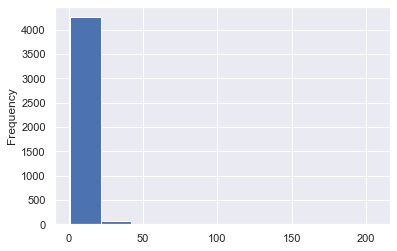

In [71]:
online_3['Site_Visit_Frequency'].plot(kind='hist')

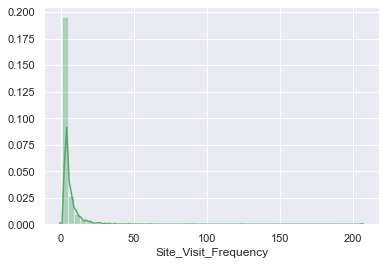

In [72]:
sns.distplot(online_3['Site_Visit_Frequency'], color = 'g')

#sns.distplot(online_3['Purchase_Made'], color = 'y')

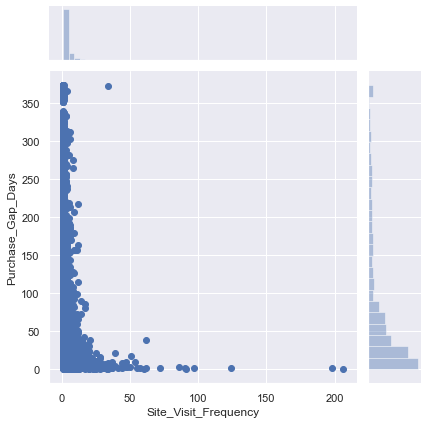

In [73]:
sns.jointplot(x='Site_Visit_Frequency', y='Purchase_Gap_Days', data= online_3, kind='scatter')

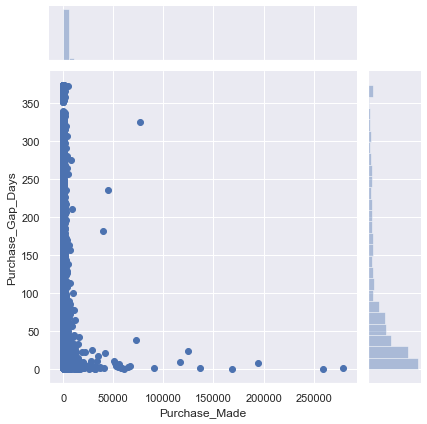

In [74]:
sns.jointplot(x='Purchase_Made', y='Purchase_Gap_Days', data= online_3, kind='scatter')

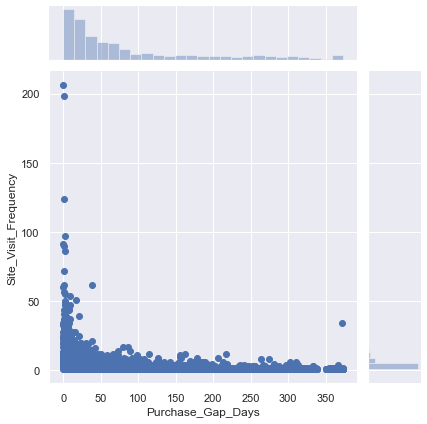

In [75]:
sns.jointplot(y='Site_Visit_Frequency', x='Purchase_Gap_Days', data= online_3, kind='scatter')

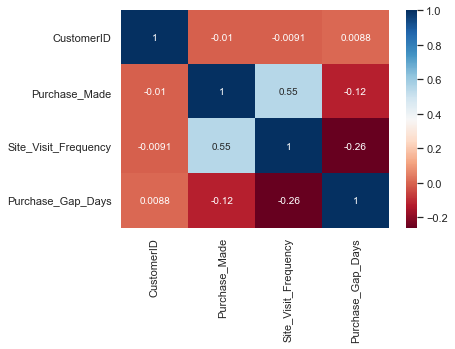

In [76]:
sns.heatmap(online_3.corr(), annot=True, cmap='RdBu')

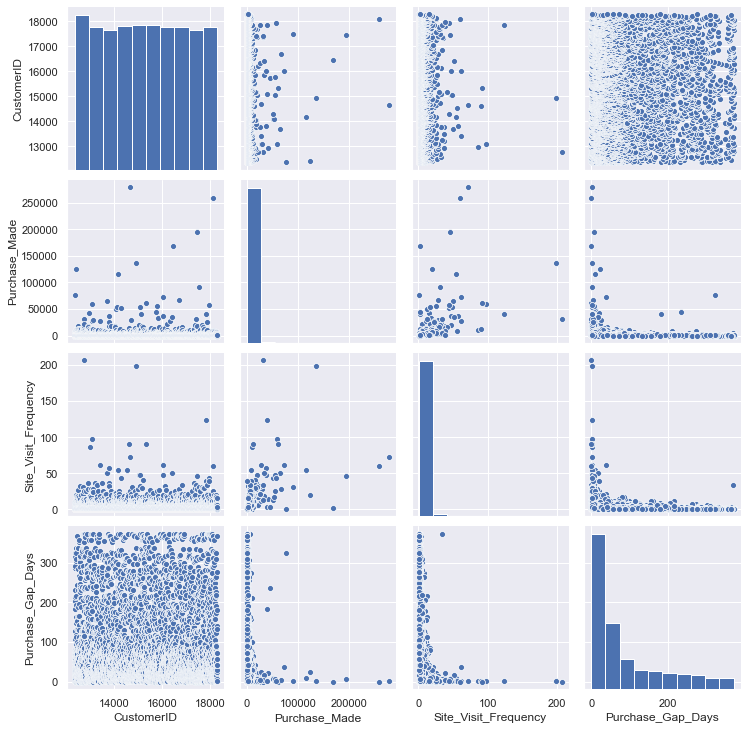

In [77]:
sns.pairplot(online_3)

In [78]:
X = online_3.iloc[:, [1,3]]
X.head()

,Purchase_Made,Site_Visit_Frequency
0,77183.60,1
1,4310.00,7
2,1437.24,4
3,1457.55,1
4,294.40,1


In [79]:
X = online_3.iloc[:, [1,3]].values
X

array([[7.71836e+04, 1.00000e+00],
       [4.31000e+03, 7.00000e+00],
       [1.43724e+03, 4.00000e+00],
       ...,
       [1.78050e+02, 2.00000e+00],
       [2.03958e+03, 1.60000e+01],
       [1.83728e+03, 3.00000e+00]])

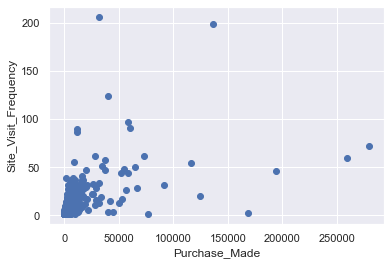

In [80]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.show()

In [81]:
from sklearn.cluster import KMeans

In [82]:
SSE = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

In [83]:
SSE

[343527146446.5074,
 113984407217.19621,
 54198697857.54714,
 33523693957.75217,
 20189886385.78773,
 13921812094.660097,
 10073445181.135487,
 6468632060.562427,
 4995138650.287358,
 3795052320.6410975,
 3119882985.7908173,
 2645318536.6227374,
 2190121667.6141796,
 1854241821.352125]

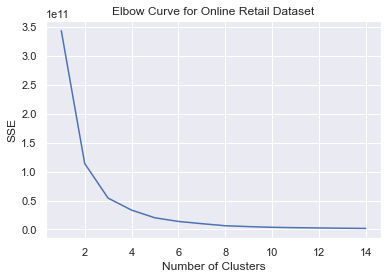

In [84]:
plt.plot(range(1,15), SSE)
plt.title ('Elbow Curve for Online Retail Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [85]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

array([2, 0, 0, ..., 0, 0, 0])

In [86]:
X[Y_kmeans==0,0]

array([4310.  , 1437.24, 1457.55, ...,  178.05, 2039.58, 1837.28])

In [87]:
X[Y_kmeans==0,1]

array([ 7.,  4.,  1., ...,  2., 16.,  3.])

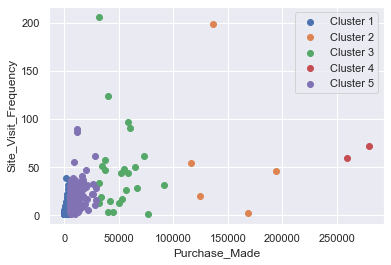

In [88]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Cluster 1')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Cluster 2')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Cluster 3')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Cluster 4')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Cluster 5')
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.legend()
plt.show()

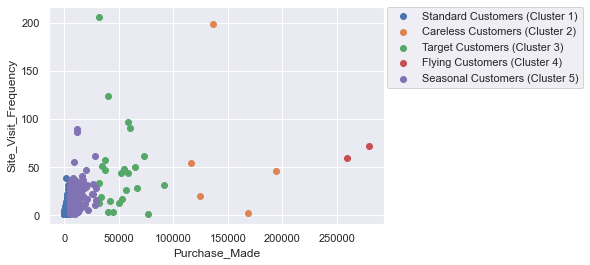

In [89]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Standard Customers (Cluster 1)')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Careless Customers (Cluster 2)')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Target Customers (Cluster 3)')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Flying Customers (Cluster 4)')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Seasonal Customers (Cluster 5)')
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

In [96]:
online_3['Cluster_Group'] = Y_kmeans
online_3.head()

,CustomerID,Purchase_Made,Country,Site_Visit_Frequency,Last_Purchase_Date,Purchase_Gap_Days,Cluster_Group
0,12346.0,77183.60,United Kingdom,1,2011-01-18,325,2
1,12347.0,4310.00,Iceland,7,2011-12-07,2,0
2,12348.0,1437.24,Finland,4,2011-09-25,75,0
3,12349.0,1457.55,Italy,1,2011-11-21,18,0
4,12350.0,294.40,Norway,1,2011-02-02,310,0


In [105]:
online_3.head()
y = online_3['Cluster_Group']
X = online_3.drop(['CustomerID', 'Cluster_Group', 'Country', 'Last_Purchase_Date', 'Purchase_Gap_Days'], axis=1)
X1 = online_3.drop(['CustomerID', 'Cluster_Group', 'Country', 'Last_Purchase_Date'], axis=1)
#online1.head()
y = online_3['Cluster_Group']
print (y.head())
print (X.head())

0    2
1    0
2    0
3    0
4    0
Name: Cluster_Group, dtype: int32
   Purchase_Made  Site_Visit_Frequency
0       77183.60                     1
1        4310.00                     7
2        1437.24                     4
3        1457.55                     1
4         294.40                     1


In [103]:
X1.head()

,Purchase_Made,Site_Visit_Frequency,Purchase_Gap_Days
0,77183.60,1,325
1,4310.00,7,2
2,1437.24,4,75
3,1457.55,1,18
4,294.40,1,310


### Creation of Train & Test Data Frames for modelling & futher processes

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print (y_train.head())

(3473, 2) (869, 2) (3473,) (869,)
560     0
747     0
3303    0
3947    4
1743    0
Name: Cluster_Group, dtype: int32


## APPLICATION OF VARIOUS MODELS on Train & Test data

- Evaluation of Model Accuracy to see whether the model is perfectly working with the Train & Test data

- Evaluation of Prediction Accuracy of Test data on models/ algorithms applied

### Using K-Neighbors Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [93]:
k_range = range (1,15)
scores = {}
scores_list = []
error = []

In [94]:
for k in k_range:
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict (X_test)
    scores[k] = metrics.accuracy_score (y_test, y_pred)
    scores_list.append (metrics.accuracy_score(y_test, y_pred))
    error.append(np.mean( y_pred != y_test))

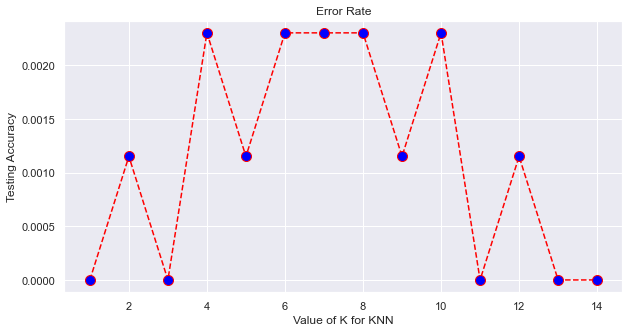

In [95]:
plt.figure(figsize= (10,5))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title ('Error Rate')
plt.xlabel ('Value of K for KNN')
plt.ylabel ('Testing Accuracy')
plt.show()

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print (confusion_matrix(y_test, y_pred))

[[814   0   0]
 [  0   4   0]
 [  0   0  51]]


In [98]:
print(f'Model Accuracy : {knn.score(X_train, y_train)}')

Model Accuracy : 0.9976965159804204


In [99]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        51

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869



In [100]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.20, random_state=40)
print (X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(3473, 3) (869, 3) (3473,) (869,)


In [101]:
k_range = range (1,15)
scores = {}
scores_list = []
error = []

In [104]:
for k1 in k_range:
    knn = KNeighborsClassifier (n_neighbors=k1)
    knn.fit(X1_train, y1_train)
    y_pred = knn.predict (X1_test)
    scores[k1] = metrics.accuracy_score (y1_test, y_pred)
    scores_list.append (metrics.accuracy_score(y1_test, y_pred))
    error.append(np.mean( y_pred != y1_test))

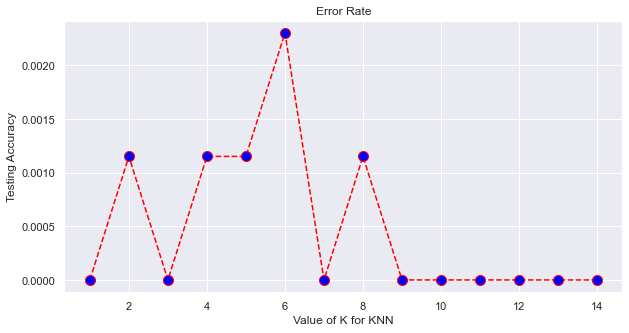

In [105]:
plt.figure(figsize= (10,5))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title ('Error Rate')
plt.xlabel ('Value of K for KNN')
plt.ylabel ('Testing Accuracy')
plt.show()

In [106]:
print (confusion_matrix(y_test, y_pred))

[[814   0   0]
 [  0   4   0]
 [  0   0  51]]


In [108]:
print(f'Model Accuracy : {knn.score(X1_train, y1_train)}')

Model Accuracy : 0.9979844514828679


In [110]:
print (classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        51

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869



- K-Neighbors Classifier model accuracy is 100%

### Using Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtree = DecisionTreeClassifier(random_state = 40)
dtree.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [113]:
print(f'Model Accuracy : {dtree.score(X1_train, y1_train)}')

Model Accuracy : 1.0


In [114]:
predictions = dtree.predict(X1_test)
print(classification_report(y1_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        51

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869



- Decision Tree Classifier accuracy is 100%

### Using Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rand_fc = RandomForestClassifier(n_estimators=200, random_state=40)
rand_fc.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [117]:
n_nodes = []
max_depths = []

for ind_tree in rand_fc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [118]:
print(f'Model Accuracy Random Forest Classifier: {rand_fc.score(X1_train, y1_train)}')

Model Accuracy Random Forest Classifier: 1.0


In [119]:
rand_fc_pred = rand_fc.predict(X1_test)
print(classification_report(y1_test, rand_fc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        51

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869



- Random Forest Classifier accuracy is 100%

## PICKLE FILE CREATION - for deployemnt process

### Creating Pickle file named 'online_knn_1.pkl' using K-Neighbors Classifier Model

In [120]:
import pickle as pkl
pkl.dump(knn, open ('online_knn_1.pkl', 'wb'))

### Creating Pickle file named 'online_rand_fc_1.pkl' using Random Forest Classifier Model

In [121]:
pkl.dump(rand_fc, open ('online_rand_fc_1.pkl', 'wb'))